# 🚦 City Traffic Pattern Clustering
This notebook demonstrates the full workflow for clustering city traffic patterns using KMeans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## Load Dataset

In [3]:
df = pd.read_csv("../data/simulated_city_traffic.csv")
df.head()

,Avg_Speed,Vehicle_Count,Time_of_Day,Day_of_Week,Weather_Condition,Latitude,Longitude
0,31.708887,3044,Morning,Weekend,Fog,37.731396,-122.440855
1,59.923496,3604,Evening,Weekday,Rain,37.813089,-122.422053
2,50.636432,1094,Morning,Weekend,Clear,37.742351,-122.380211
3,57.567036,4084,Evening,Weekday,Rain,37.810251,-122.353222
4,12.076123,213,Evening,Weekend,Fog,37.820074,-122.444264


## Exploratory Data Analysis

In [4]:
df.describe(include="all")

,Avg_Speed,Vehicle_Count,Time_of_Day,Day_of_Week,Weather_Condition,Latitude,Longitude
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,4,2,4,NaN,NaN
top,NaN,NaN,Evening,Weekend,Clear,NaN,NaN
freq,NaN,NaN,275,522,314,NaN,NaN
mean,39.464854,2451.088000,NaN,NaN,NaN,37.773288,-122.422952
std,17.851717,1416.430875,NaN,NaN,NaN,0.043096,0.043668
min,10.284819,55.000000,NaN,NaN,NaN,37.700984,-122.499432
25%,23.420735,1280.000000,NaN,NaN,NaN,37.736978,-122.460185
50%,39.318101,2374.000000,NaN,NaN,NaN,37.771478,-122.421444
75%,54.934861,3672.000000,NaN,NaN,NaN,37.810865,-122.386660


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


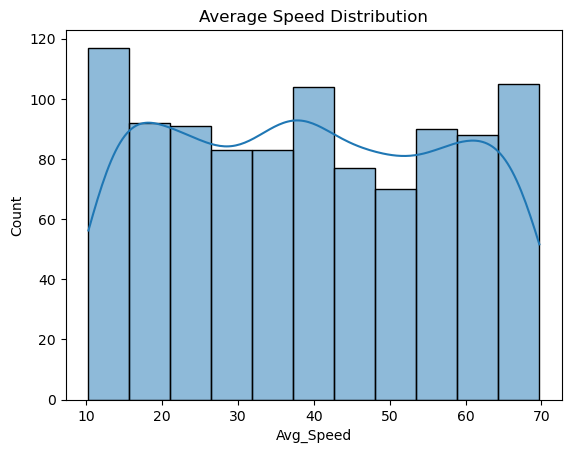

In [5]:
sns.histplot(df["Avg_Speed"], kde=True)
plt.title("Average Speed Distribution")
plt.show()

## Preprocessing Setup

In [6]:
numeric_features = ["Avg_Speed", "Vehicle_Count", "Latitude", "Longitude"]
categorical_features = ["Time_of_Day", "Day_of_Week", "Weather_Condition"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

X = preprocessor.fit_transform(df)

## Model Training

In [7]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)
df["Cluster"] = model.predict(X)

C:\Users\Amit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Model Evaluation

In [8]:
score = silhouette_score(X, df["Cluster"])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1612


## PCA Visualization of Clusters

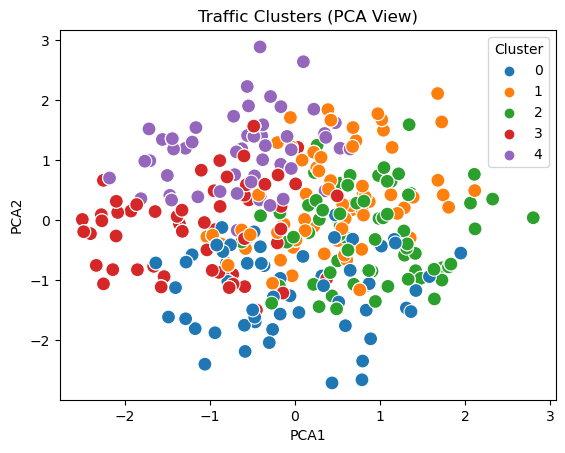

In [9]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray() if hasattr(X, "toarray") else X)
df["PCA1"], df["PCA2"] = reduced[:, 0], reduced[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=100)
plt.title("Traffic Clusters (PCA View)")
plt.show()

## Save Model and Preprocessor

In [ ]:
import os
os.makedirs("model", exist_ok=True)
with open("model/kmeans_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("model/preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)